# Yelp Analysis for traditional American Restaurants
#### Chao Chang, Shuyang Chen, Kunning Wang, Youhui Ye

## 1 Introduction
Yelp is an app which help people find great local businesses. The reviews on Yelp will not only help costumers to figure out if a bussiness is good but also help business owners to find out their disadvantages to be improved in the future. The goal of this project is to provide useful insights to business owners on Yelp and give them some data-driven and practical suggestions in order to improve their ratings in Yelp.

We mainly focused on giving suggestions to American Traditional Restaurants and analysed their reviews together with attributes. There are 483009 reviews in total for 6307 restaurants. We used Natural Language Processing methods and lasso regression to identify important topics in the reviews. And the important attributes are identified by decision tree. We then analysed those topics and attributes to develop business recommendations for restaurants.

## 2 Data Cleaning

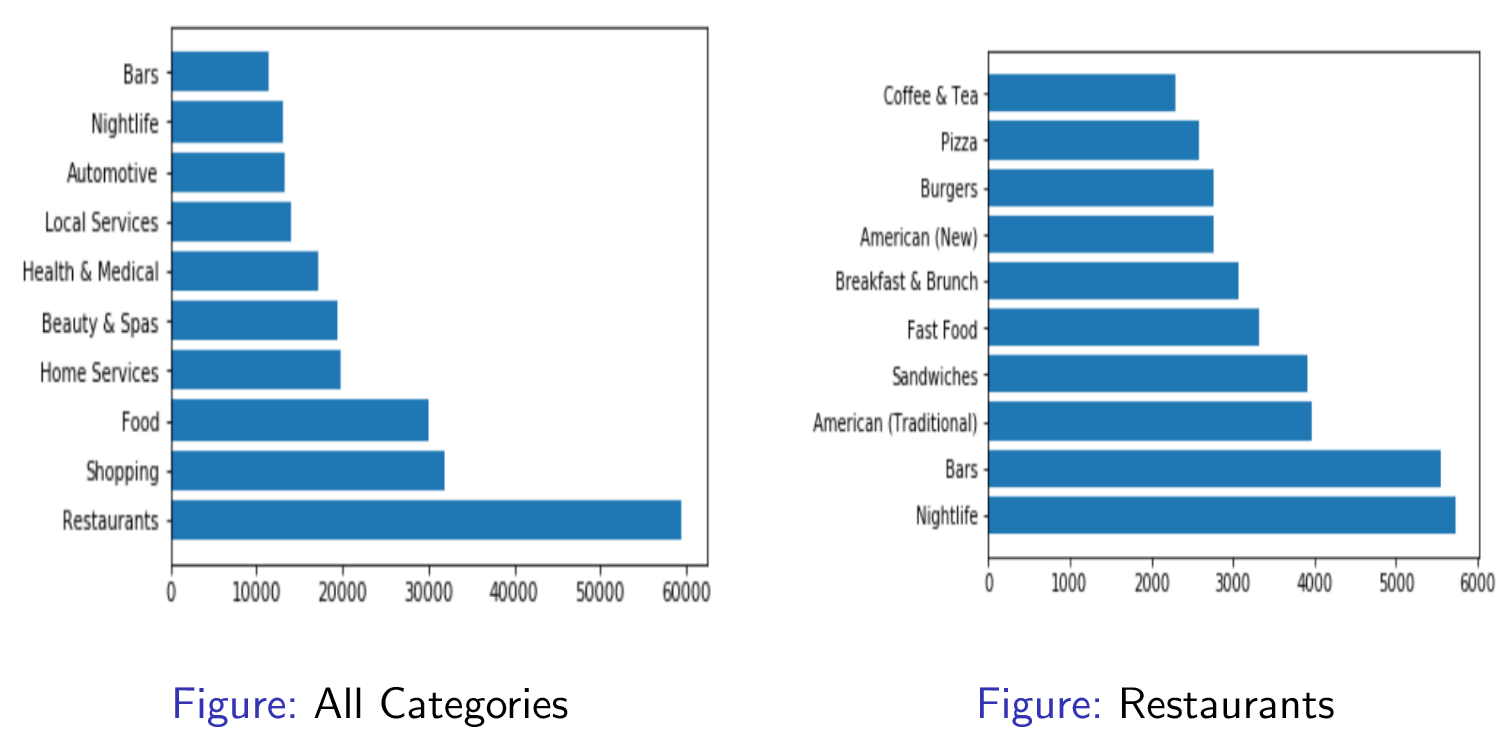

In [8]:
from IPython.display import display, Image
display(Image(filename='../images/categories.png',width=600,height=150))#######smaller

The review and business data are merged according to the category. There is no missing review but quite a few business attributes are missed. Since all of those attributes are categorical, we added a level representing missing values to each attribute. We also removed some features which are difficult to use, such as: city, name and postal_code. In order to find out the up-to-date information, we only selected reviews made after 2015-01-01 for later analysis.

## 3 Review data
### 3.1 Natural Language Processing
We are going to convert messy text to a numerical vector representation through a bag-of-words approach.
This task is accomplished by the following steps:
1. Split the review text into a list of lowercase words.
2. Extract noun phrases from the review text and expand abbreviation.
3. Convert each word to its root form using Porterstemmer 
4. Add negative tags to words in a negative sentence.
5. Remove all stop words and punctuations.
6. Calculate the Tf-idf value for each word and noun phrase

Step 1-5 convert the original review text to words vector and allow us to merge different forms of the same word. The cleaning result is visualized by the word cloud picture below. In step 6, we chose tf-idf to be a measure considering both frequency and importance of the words. There are 10000 most frequent words and phrases in our final feature set toghther with 35 most common attributes.

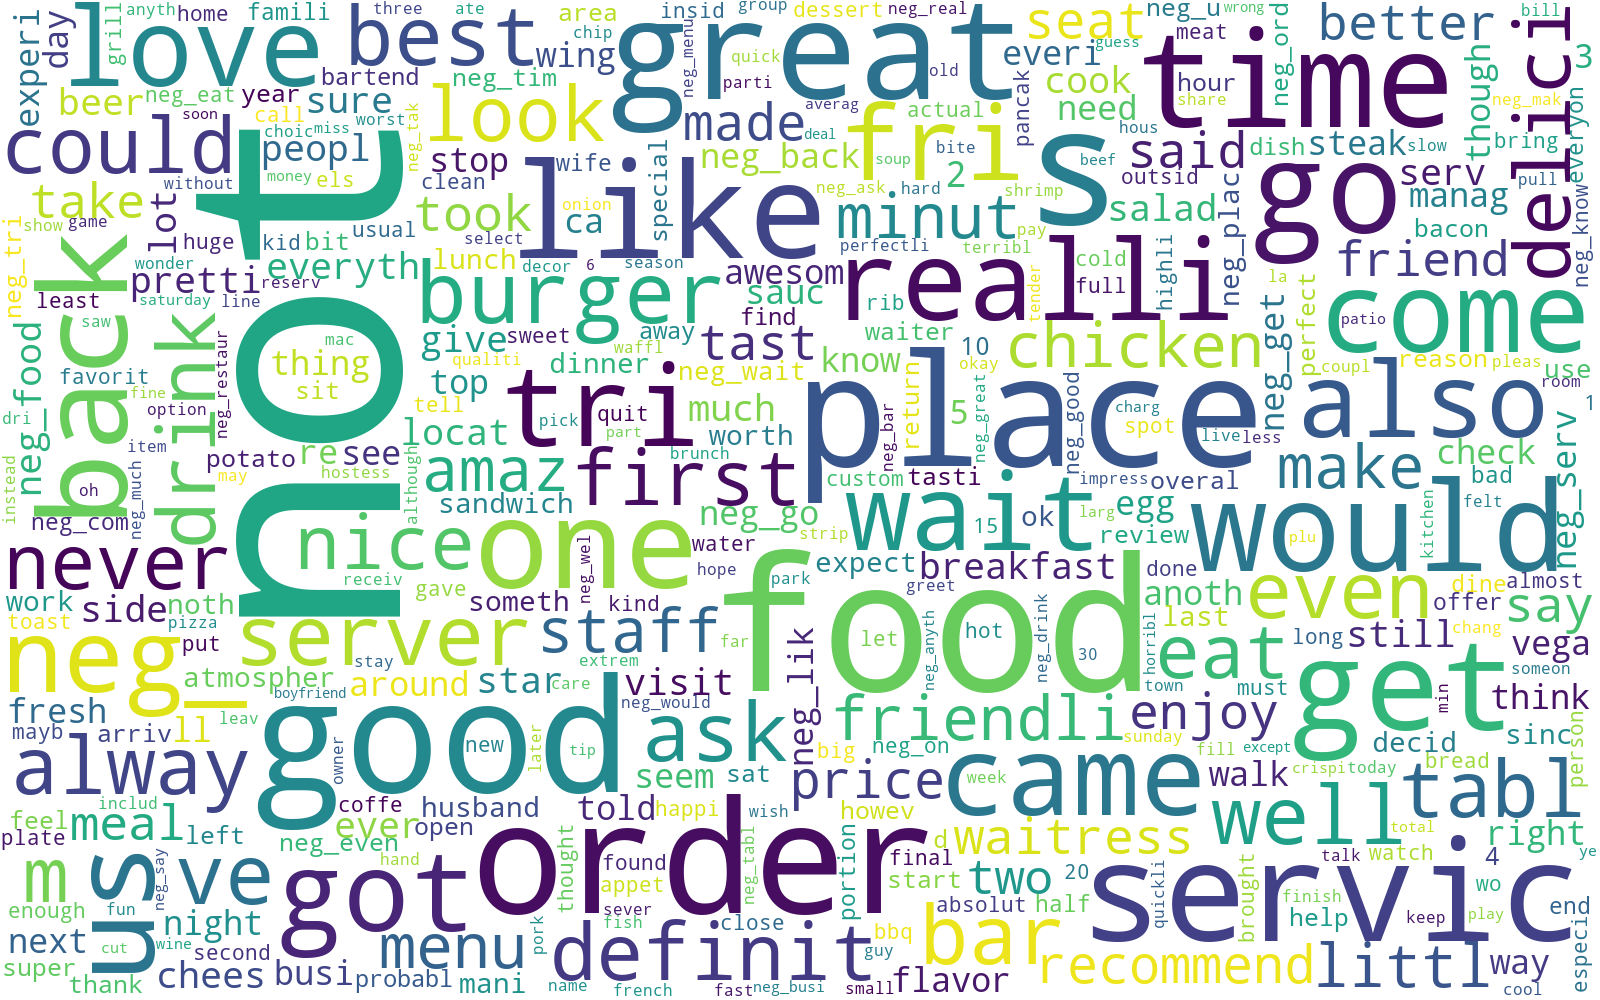

In [12]:
display(Image(filename='../images/word_cloud.png',width=400,height=100))

### 3.2 Feature selection
In order to give recommendations for American Traditional Restaurant business, the relative importance for each word is needed. Since the feature space has a high dimension, we choose lasso regression to select important features first. The selecting process of the parameter $\lambda$ is shown below. We chose an $\lambda$ with which only 50 words/phrases are selected in the final model.

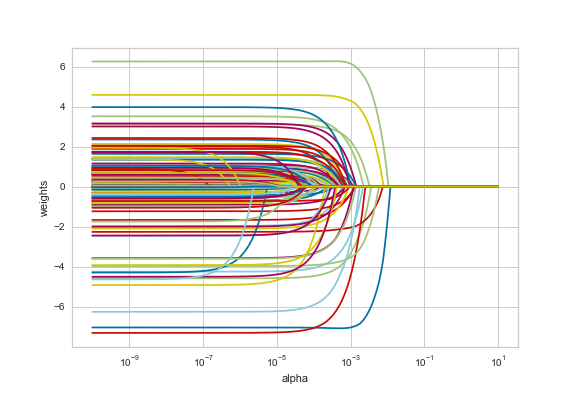

In [3]:
display(Image(filename='../images/variable_selection.png',width=500,height=150))

We also give suggestions for each individual business based on the reviews it got. We calculated differences between the tf-idf values for each business and the overall average of tf-idf values among those 50 words/phrases. Then multiply them by the corresponding coefficients in lasso regression and use their absolute values to indicate the potential increase of ratings. The suggestions are given based on the order of the ratings increasings.

## 4 Attribute Data
In this part, we want to find out most influential attributes for ratings among all traditional American restaurants. We expanded the subattributes and got 66 attributes for analysis. A list of most important attributes for improving ratings are selected based on CART and linear regression.

### 4.1 Missing data
Since the overall missing rate is cround 0.5, we decided to only select most common attributes(missing rate is lower than 0.5). Then we got 35 attributes and the overall missing rate is 16%.

### 4.2 CART
We fitted the decision tree and selected 10 important attributes using the importance given by the output.

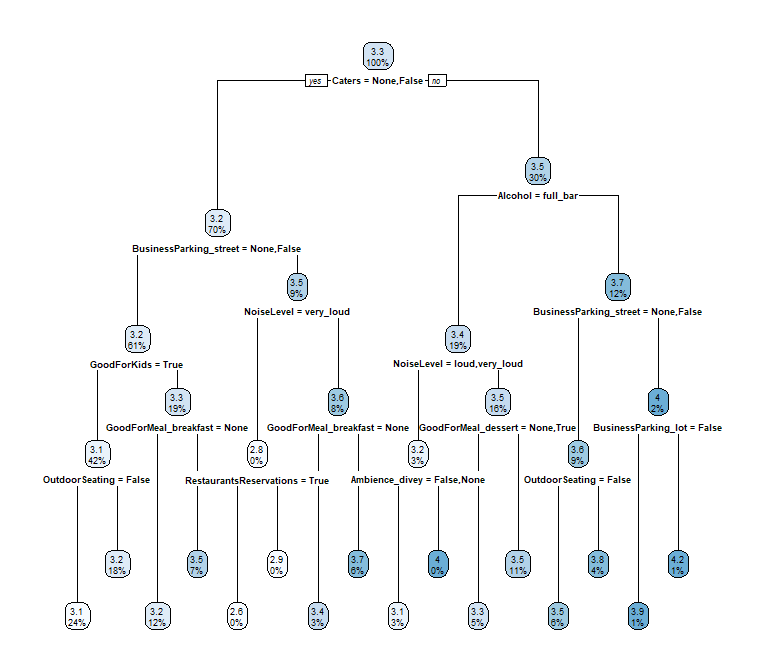

In [13]:
display(Image(filename='../images/WechatIMG467.png',width=400,height=400))

### 4.3 linear regression
With those attributes selected, we fit a linear model to evaluate the influence for each attributes and giving suggestions in a quantitive way consequently. The result is shown below.

## 5 Suggestions for business owners
1. As for food, our advice is that the menu should include waffle, salmon and desserts, because people seem to enjoy these food in an American restaurant. Furthermore, the meat should be juicy and crisp. All the materials should be fresh. You'd better hold happy hour every few days for attracting people. For drinks, you can prepare some tea and cocktails, people would love them. 
2. As for service, you should train your waiters and bartenders well so that people will have a good experience in your restaurant if the server perform to be courteous and friendly. It is very important to make your customers feel welcomed. People will also have a good experience if they can have shorter waiting time. 
3. As for facilities, playing sports games on TV makes the customers happy. Try to keep kitchens and tables clean is necessary for high ratings. Customers tend to give higher ratings to a restaurant with parking places and patios. Also, for those restaurants whose locations are difficult to find, a marked sign may help a lot.
4. As for environment, having great background music may make your restaurant popular. Controling the noise in your restaurant is a good way to increase your rating since customers generally do not like noisy environments. You'd better prepare some big tables for families and large groups.


## 6 Discussion

### 6.1 Advantages
1. Using Lasso regression to select features is a good way to deal with high dimensional problems and we can get coefficients from it.
2. Using tf-idf value, we strike a balance between frequency and the ability to do classification.

### 6.2 Disadvantages
1. Only negative tag can not identify all the negative reviews. Sentiment analysis can be considered in the future.
2. User data can be explored for later analysis.

### 7 Contributions
- Chao Chang: Data merging and cleaning, report summary and shiny app.
- Shuyang Chen: Word tokenization, feature selection and report summary.
- Kunning Wang: Word tokenization, CART, regression, report summary.
- Youhui Ye: Lasso regression, word cloud, report summary and slides.

### References
https://cran.r-project.org/web/packages/rpart/rpart.pdf